In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Using RandomForestClassifier

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop(['Outcome'],axis='columns'),df.Outcome,test_size=0.2)

In [4]:
rd=RandomForestClassifier()
rd.fit(x_train,y_train)

RandomForestClassifier()

In [5]:
rd.score(x_test,y_test)

0.7597402597402597

In [6]:
y_pred=rd.predict(x_test)
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred)
cm

array([[80, 14],
       [23, 37]], dtype=int64)

<Axes: >

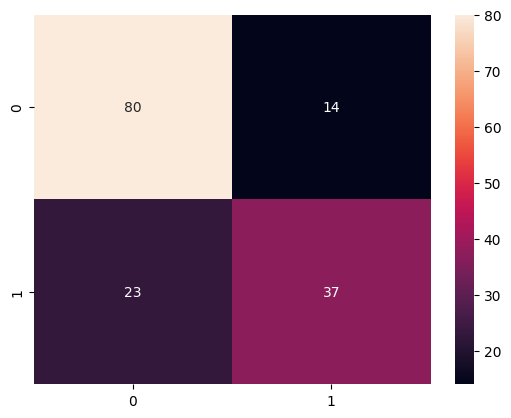

In [7]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.heatmap(cm,annot=True)


In [8]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81        94
           1       0.73      0.62      0.67        60

    accuracy                           0.76       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



In [11]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),  # Change base_estimator to estimator
    n_estimators=100,
    max_samples=0.8,
    oob_score=True,
    random_state=0
)
bag_model.fit(x_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, oob_score=True, random_state=0)

In [12]:
bag_model.score(x_test, y_test)

0.7792207792207793

In [13]:
y_pred1=rd.predict(x_test)
cm1=confusion_matrix(y_test,y_pred1)
cm1

array([[80, 14],
       [23, 37]], dtype=int64)

<Axes: >

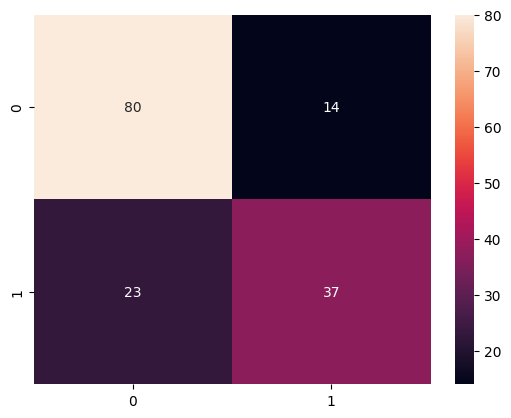

In [14]:
sb.heatmap(cm1,annot=True)